<span style="color: rgb(0,46,91);">

<font face = "Times New Roman" size = "6"><b><center>Práctica 5 - Regresión Lineal</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>"Salary Prediction"</center></b></font>

<center><img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal-SinFondo.png" style="width:auto;height:140px;" title="Logo ITESO"></center>
    
<font face = "Times New Roman" size = "5"><b><center>Análisis Estadístico Multivariado</center></b></font>

<font face = "Times New Roman" size = "4"><center>Samantha Sánchez Tinoco</center></font>
<font face = "Times New Roman" size = "4"><center>Marcela Quintero Pérez</center></font>

<div align="right"><font face = "Times New Roman" size = "2">17 de marzo de 2025.</font></div>

</span>


Dataset: https://www.kaggle.com/datasets/mrsimple07/salary-prediction-data

In [1]:
# Librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

sns.set_theme(style="whitegrid")

## Introducción

El análisis de los factores que determinan los ingresos salariales es clave para comprender las dinámicas laborales y tomar decisiones estratégicas en diversos contextos. En esta práctica, utilizaremos un conjunto de datos con información sobre empleados, que incluye variables como edad, experiencia, nivel educativo, género y salario. Para abordar este análisis, emplearemos dos modelos estadísticos: un Modelo de Regresión Lineal Simple (RLS) y un Modelo de Regresión Lineal Múltiple (RLM). El objetivo es explorar cómo las variables independientes, como la edad, experiencia y educación, afectan la variable dependiente (Salary) y comparar la capacidad predictiva de ambos enfoques. A través de estos modelos, buscaremos identificar patrones y relaciones significativas que nos permitan predecir el salario de un empleado en función de sus características.

## Objetivo

En esta práctica, analizaremos un conjunto de datos que incluye información sobre el salario (Salary), la edad (Age), la experiencia (Experience), el nivel educativo (Education) y el género (Gender) de un grupo de empleados. El objetivo es identificar la relación entre la variable dependiente (Salary) y las variables independientes (Age, Experience, Education y Gender).

## Descripción del conjunto de datos

Hemos seleccionado un conjunto de datos que contiene información sobre el salario de los empleados y los factores que pueden influir en él, como el nivel de educación, la edad, el género y la experiencia. Nuestro objetivo es analizar la relación entre estas variables, donde la variable objetivo (target) es Salary.

Las características de nuestro dataset son:

- **Job_Title**: Puesto del empleado.
- **Education**: Nivel educativo alcanzado.
- **Experience**: Años de experiencia.
- **Gender**: Género del empleado (Femenino, Masculino).
- **Age**: Edad en años.
- **Salary**: Ingreso salarial.

In [2]:
df = pd.read_csv('./salary_prediction_data.csv')

df.head(5)

,Job_Title,Education,Experience,Gender,Age,Salary
0,Manager,High School,8,Male,63,84620.05366
1,Director,PhD,11,Male,59,142591.25590
2,Manager,Bachelor,28,Female,61,97800.25540
3,Director,High School,29,Male,45,96834.67128
4,Analyst,PhD,25,Female,26,132157.78620


Información del dataset:

In [3]:
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Job_Title   1000 non-null   object 
 1   Education   1000 non-null   object 
 2   Experience  1000 non-null   int64  
 3   Gender      1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [4]:
print("\nDatos nulos:")
print(df.isnull().sum())


Datos nulos:
Job_Title     0
Education     0
Experience    0
Gender        0
Age           0
Salary        0
dtype: int64


In [5]:
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
        Experience          Age         Salary
count  1000.000000  1000.000000    1000.000000
mean     14.771000    42.377000  105558.404238
std       8.341111    13.609412   28256.972074
min       1.000000    20.000000   33510.510670
25%       7.000000    30.000000   85032.141520
50%      15.000000    43.000000  104314.518300
75%      22.000000    55.000000  126804.047550
max      29.000000    64.000000  193016.602100


En general, los datos muestran una diversidad significativa en la experiencia, edad y salario de los empleados, con una concentración de empleados con experiencia moderada (entre 7 y 22 años) y edades principalmente entre 30 y 55 años. Aunque el salario promedio es relativamente alto (105,558.40), existe una considerable dispersión, con una amplia gama de ingresos, desde 33,510.51 hasta 193,016.60. Esto sugiere que, a pesar de las similitudes en la experiencia y la edad de los empleados, existen diferencias notables en los salarios, lo que podría estar relacionado con factores adicionales como el puesto, la industria o el nivel educativo.

A continuación se realizará una exploración de los distintos tipos de variables y su comportamiento.

#### Variables numéricas:

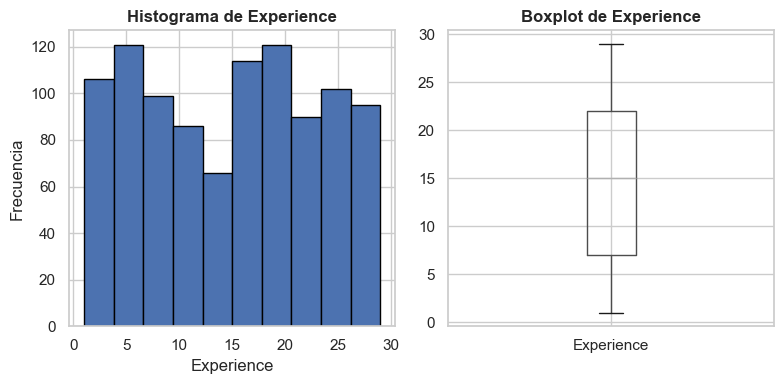

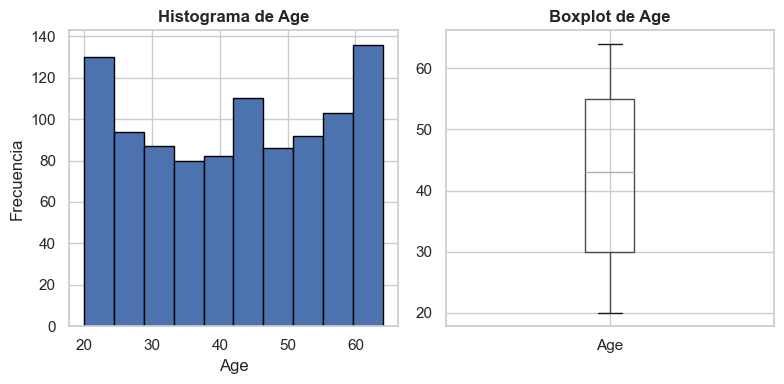

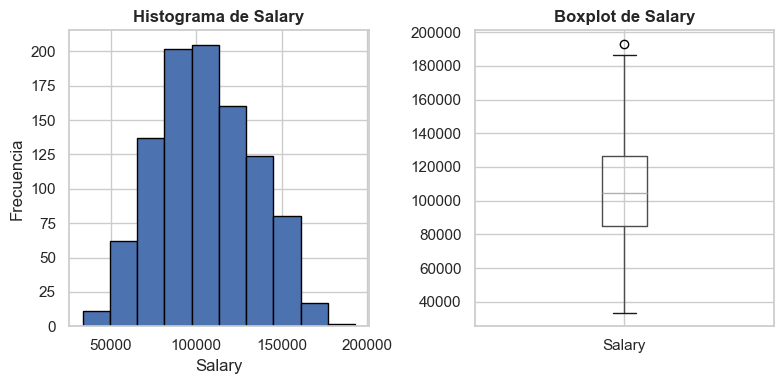

In [6]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 4))

        # Histograma
        plt.subplot(1, 2, 1)
        df[column].hist(bins=10, edgecolor='black')
        plt.title(f'Histograma de {column}', fontweight='bold')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')

        # Boxplot para outliers
        plt.subplot(1, 2, 2)
        df.boxplot(column=column)
        plt.title(f'Boxplot de {column}', fontweight='bold')

        plt.tight_layout()
        plt.show()

#### Variables categóricas:

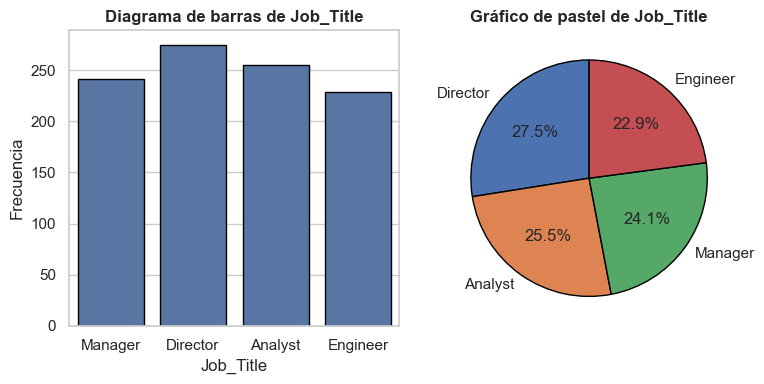

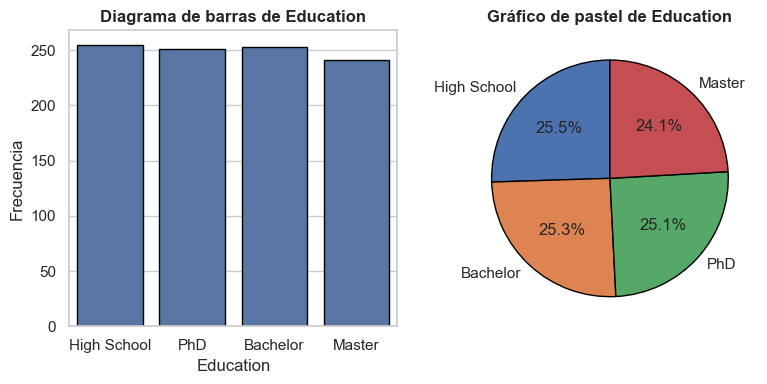

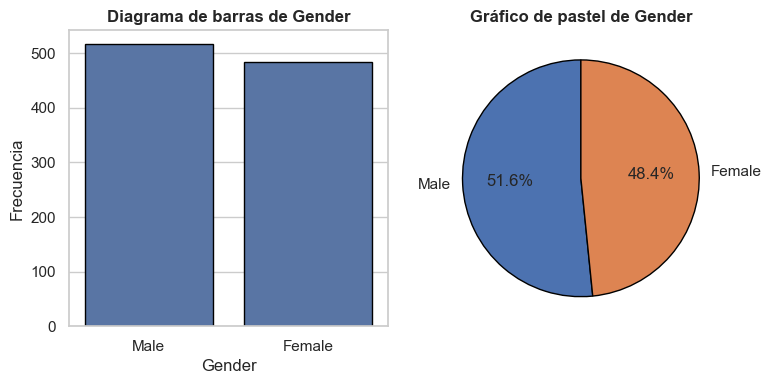

In [7]:
for column in df.columns:
    if df[column].dtype == 'object':
        plt.figure(figsize=(8, 4))

        # Diagrama de barras con Seaborn
        plt.subplot(1, 2, 1)
        sns.countplot(data=df, x=column, edgecolor='black')
        plt.title(f'Diagrama de barras de {column}', fontweight='bold')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')

        # Gráfico de pastel
        plt.subplot(1, 2, 2)
        df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
        plt.title(f'Gráfico de pastel de {column}', fontweight='bold')
        plt.ylabel('')

        plt.tight_layout()
        plt.show()

Observamos que solo nuestra variable objetivo, Salary, presenta valores atípicos (outliers). Por otro lado, las variables categóricas muestran distribuciones y frecuencias similares en sus valores. Para integrar las variables categóricas en nuestro modelo, procederemos a transformarlas. En cuanto a las variables numéricas, debido a que están medidas en distintas unidades (como años y la moneda), se estandarizarán sus valores para asegurar una comparación adecuada:

In [8]:
columns_to_encode = ['Gender', 'Job_Title', 'Education']

le = LabelEncoder()
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [9]:
columns_to_scale = ['Age', 'Salary', 'Experience']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [10]:
df.head(5)

,Job_Title,Education,Experience,Gender,Age,Salary
0,3,1,-0.812169,1,1.516107,-0.741368
1,1,3,-0.452324,1,1.222045,1.311230
2,3,0,1.586793,0,1.369076,-0.274694
3,1,1,1.706741,1,0.192831,-0.308883
4,0,3,1.226949,0,-1.203961,0.941810


Graficamos la matriz de correlación entre las variables independientes con las variables dependientes:

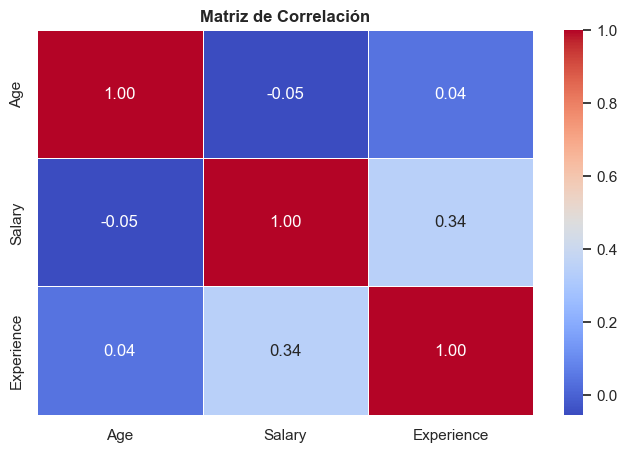

In [11]:
correlation_matrix = df[columns_to_scale].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correlación", fontweight='bold')
plt.show()

Ahora generamos gráficos comparativos entre las variables para analizar su comportamiento y detectar posibles relaciones que puedan ser útiles para el modelado o análisis posterior:

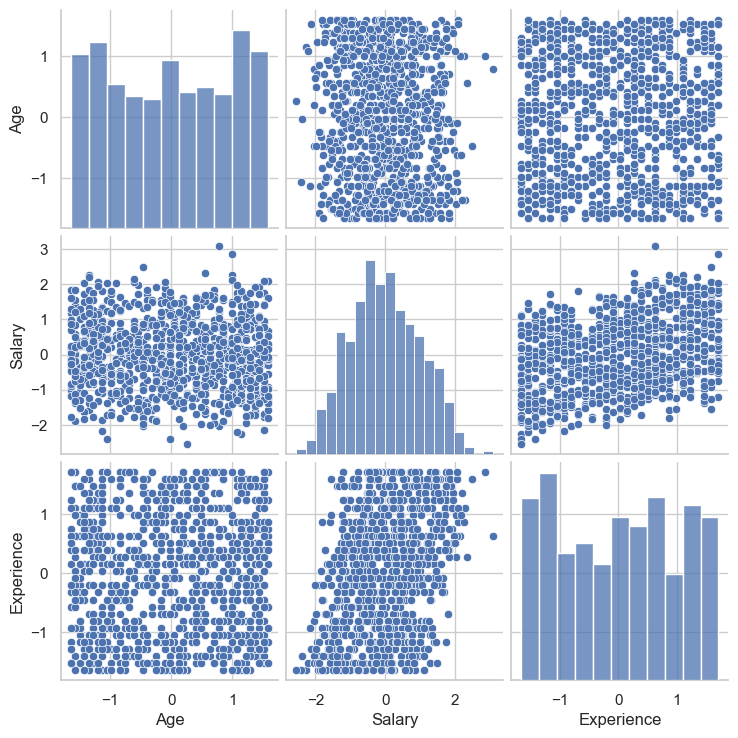

In [12]:
sns.pairplot(df[columns_to_scale])
plt.show()

Con la información y los gráficos anteriores podemos concluir que:

- No hay una relación significativa entre la edad y el salario, ni entre la edad y la experiencia.
- Existe una relación moderada entre el salario y la experiencia, lo que es consistente con lo que se podría esperar en muchos sectores, donde los empleados más experimentados tienden a recibir salarios más altos.
- Podría haber factores ocultos (como educación, sector laboral, habilidades) que expliquen mejor la variabilidad en los ingresos.

## Desarrollo y resultados

Se crearán dos modelos, uno de regresión lineal simple donde solo se hará uso de una variable independiente, y otro de regresión lineal múltiple donde se hará uso de las demás variables independientes.

#### Regresión Lineal Simple

Con el análisis previo de los datos, seleccionamos nuestra variable independiente **X** que será experiencia y nuestra variable dependiente **Y** de salario:

In [13]:
X = df[['Experience']].values
Y = df['Salary'].values

Hacemos el split de los datos en test (20% de los datos) y training (80% de los datos):

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

Procedemos a crear y entrenar el modelo de regresión lineal simple:

In [15]:
rls = LinearRegression()
modelo_rls = rls.fit(X_train, Y_train)
Y_pred_rls = rls.predict(X_test)

Evaluación del modelo:

In [16]:
print(f"Coeficientes: {rls.coef_[0]:.2f}, Intercepto: {rls.intercept_:.2f}")
print(f"Error cuadrático medio: {mean_squared_error(Y_test, Y_pred_rls):.2f}")
print(f"R^2 Score: {r2_score(Y_test, Y_pred_rls):.2f}")

Coeficientes: 0.32, Intercepto: -0.00
Error cuadrático medio: 0.85
R^2 Score: 0.17


- La baja puntuación de R² sugiere que hay factores importantes que no están siendo tomados en cuenta por el modelo.
- El error cuadrático medio también indica que el modelo tiene un margen de error considerable.
- Podría ser necesario considerar características adicionales para mejorar su desempeño.

#### Regresión Lineal Múltiple

Con el análisis previo de los datos, seleccionamos nuestras variables independientes **X** que serán experiencia, edad, nombre del peusto, nivel de eduación y género, así como nuestra variable dependiente **Y** de salario:

In [17]:
X = df[['Job_Title', 'Education', 'Experience', 'Gender', 'Age']].values 
Y = df['Salary'].values

Hacemos el split de los datos en test (20% de los datos) y training (80% de los datos):

In [18]:
X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(X, Y, test_size=0.2, random_state=42)

Procedemos a crear y entrenar el modelo de regresión lineal múltiple:

In [19]:
rlm = LinearRegression()
modelo_rlm = rlm.fit(X_train_m, Y_train_m)
Y_pred_rlm = rlm.predict(X_test_m)

Evaluación del modelo:

In [20]:
print(f"Coeficientes: {rlm.coef_}, Intercepto: {rlm.intercept_}")
print(f"Error cuadrático medio: {mean_squared_error(Y_test_m, Y_pred_rlm):.2f}")
print(f"R^2 Score: {r2_score(Y_test_m, Y_pred_rlm):.2f}")

Coeficientes: [ 0.06619929  0.59191991  0.30874863  0.03137755 -0.03616162], Intercepto: -1.0089972654517625
Error cuadrático medio: 0.46
R^2 Score: 0.55


- Este modelo mejoró respecto al anterior, explica más de la mitad de la variabilidad en los datos.
- Aunque el rendimiento es razonablemente bueno, el modelo aún podría mejorarse considerando nuevas características, probando diferentes técnicas de modelado o ajustando los parámetros para optimizar aún más la precisión.

## Conclusiones

#### Comparación de los modelos

In [21]:
diff_r2 = r2_score(Y_test_m, Y_pred_rlm) - r2_score(Y_test, Y_pred_rls)

print("\nComparación de Modelos: \n")

if diff_r2 > 0:
    print(f"El modelo de regresión lineal múltiple (R2: {r2_score(Y_test_m, Y_pred_rlm):.4f}) tiene un mejor ajuste en comparación con el modelo de regresión lineal simple (R2: {r2_score(Y_test, Y_pred_rls):.4f}).")
else:
    print(f"El modelo de regresión lineal simple (R2: {r2_score(Y_test, Y_pred_rls):.4f}) es suficiente para explicar la relación, con un rendimiento comparable al de la regresión lineal múltiple (R2: {r2_score(Y_test_m, Y_pred_rlm):.4f}).")



Comparación de Modelos: 

El modelo de regresión lineal múltiple (R2: 0.5538) tiene un mejor ajuste en comparación con el modelo de regresión lineal simple (R2: 0.1723).


Evaluación de los modelos con otras métricas: MSE y MAE

In [22]:
mse_rlm = mean_squared_error(Y_test_m, Y_pred_rlm)
mse_rls = mean_squared_error(Y_test, Y_pred_rls)

mae_rlm = mean_absolute_error(Y_test_m, Y_pred_rlm)
mae_rls = mean_absolute_error(Y_test, Y_pred_rls)

print(f"\nMSE de RLM: {mse_rlm:.4f}, MSE de RLS: {mse_rls:.4f}")
print(f"MAE de RLM: {mae_rlm:.4f}, MAE de RLS: {mae_rls:.4f}")


MSE de RLM: 0.4567, MSE de RLS: 0.8472
MAE de RLM: 0.5491, MAE de RLS: 0.7643


Los resultados muestran que el modelo de regresión lineal múltiple (RLM) supera al modelo de regresión lineal simple (RLS) en términos de precisión y ajuste, debido a la incorporación de múltiples variables explicativas.

Comparamos entre los valores reales y las predicciones de los modelos para evaluar su precisión y su desempeño:

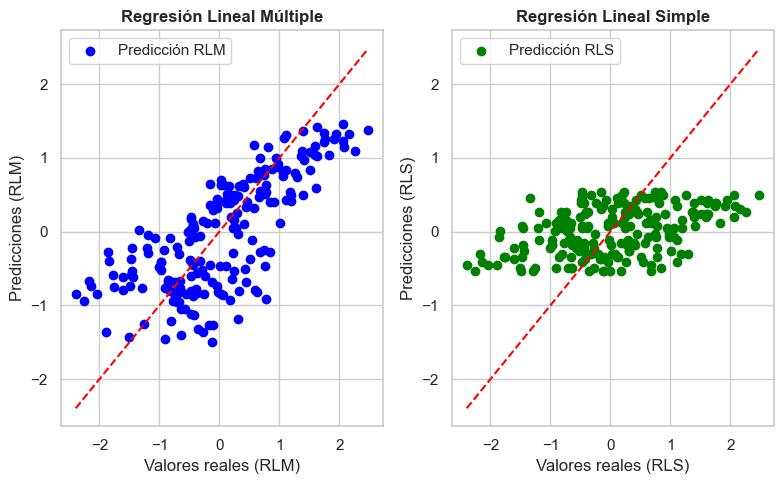

In [23]:
plt.figure(figsize=(8, 5))

# Gráfico de dispersión para RLS
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_pred_rls, color='green', label='Predicción RLS')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.title("Regresión Lineal Simple", fontweight='bold')
plt.xlabel("Valores reales (RLS)")
plt.ylabel("Predicciones (RLS)")
plt.legend()

# Gráfico de dispersión para RLM
plt.subplot(1, 2, 1)
plt.scatter(Y_test_m, Y_pred_rlm, color='blue', label='Predicción RLM')
plt.plot([min(Y_test_m), max(Y_test_m)], [min(Y_test_m), max(Y_test_m)], color='red', linestyle='--')
plt.title("Regresión Lineal Múltiple", fontweight='bold')
plt.xlabel("Valores reales (RLM)")
plt.ylabel("Predicciones (RLM)")
plt.legend()

plt.tight_layout()
plt.show()

Con este gráfico podemos observar que el modelo de regresión lineal múltiple (RLM) tiene un mejor ajuste, el uso de las múltiples variables explicativas fueron clave para poder predecir el salario, ya que este modelo captura mejor la relación entre las otras carácterísticas de los empleados y su salario, con el modelo de regresión lineal simple (RLS) solo estábamos considerando una variable independiente, lo cuál es insuficiente para modelar de manera precisa la complejidad de cómo se puede determinar el salario de un empleado.